# Catboost
- n_estimators：表示用于创建树的最大数量；
- learning_rate：表示学习率，用于减少梯度的级别；
- eval_metric：表示用于过度拟合检测和最佳模型选择的度量标准；
- depth：表示树的深度；
- subsample：表示数据行的采样率，不能在贝叶斯增强类型设置中使用；
- l2_leaf_reg：表示成本函数的L2规则化项的系数；
- random_strength：表示在选择树结构时用于对拆分评分的随机量，使用此参数可以避免模型过度拟合；
- min_data_in_leaf：表示在一个叶子中训练样本的最小数量。CatBoost不会在样本总数小于指定值的叶子中搜索新的拆分；
- colsample_bylevel, colsample_bytree, colsample_bynode — 分别表示各个层、各棵树、各个节点的列采样率；
- task_type：表示选择“GPU”或“CPU”。如果数据集足够大（从数万个对象开始），那么在GPU上的训练与在CPU上的训练相比速度会有显著的提升，数据集越大，加速就越明显；
- boosting_type：表示在默认情况下，小数据集的增强类型值设置为“Ordered”。这可以防止过度拟合，但在计算方面的成本会很高。可以尝试将此参数的值设置为“Plain”，来提高训练速度；
- rsm：对于那些具有几百个特性的数据集，rsm参数加快了训练的速度，通常对训练的质量不会有影响。另外，不建议为只有少量（10-20）特征的数据集更改rsm参数的默认值；
- border_count：此参数定义了每个特征的分割数。默认情况下，如果在CPU上执行训练，它的值设置为254，如果在GPU上执行训练，则设置为128；

注意：
- 支持即用的分类特征，因此我们不需要对分类特征进行预处理（例如，通过 LabelEncoding 或 OneHotEncoding）。事实上，CatBoost 的文档明确地说明不要在预处理期间使用热编码，因为“这会影响训练速度和最终的效果”；

In [1]:
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor, CatBoostClassifier

# 加载数据，对数据进行基本处理

In [2]:
iris = load_iris()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
x_train.shape, x_val.shape

((120, 4), (30, 4))

<AxesSubplot: ylabel='count'>

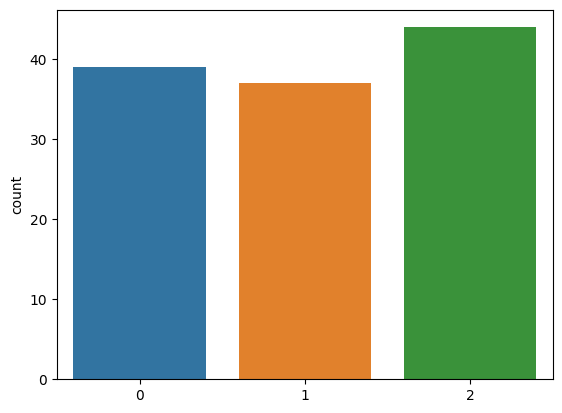

In [4]:
sns.countplot(x=y_train)

# 模型训练

## 回归模型 CatBoostRegressor

In [5]:
cbr = CatBoostRegressor()

In [6]:
cbr.fit(x_train, y_train)

Learning rate set to 0.029288
0:	learn: 0.8098656	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.7923583	total: 65.2ms	remaining: 32.5s
2:	learn: 0.7748618	total: 65.6ms	remaining: 21.8s
3:	learn: 0.7575708	total: 66.8ms	remaining: 16.6s
4:	learn: 0.7405179	total: 67.8ms	remaining: 13.5s
5:	learn: 0.7229468	total: 68.4ms	remaining: 11.3s
6:	learn: 0.7057370	total: 69.2ms	remaining: 9.82s
7:	learn: 0.6901769	total: 70.1ms	remaining: 8.69s
8:	learn: 0.6757223	total: 70.9ms	remaining: 7.81s
9:	learn: 0.6618899	total: 71.5ms	remaining: 7.08s
10:	learn: 0.6464778	total: 72.3ms	remaining: 6.5s
11:	learn: 0.6333669	total: 73.4ms	remaining: 6.04s
12:	learn: 0.6196193	total: 74.2ms	remaining: 5.63s
13:	learn: 0.6064398	total: 75ms	remaining: 5.28s
14:	learn: 0.5933078	total: 75.8ms	remaining: 4.98s
15:	learn: 0.5800996	total: 77.1ms	remaining: 4.74s
16:	learn: 0.5663464	total: 77.9ms	remaining: 4.5s
17:	learn: 0.5537165	total: 78.7ms	remaining: 4.29s
18:	learn: 0.5407728	total: 79.2ms	remaining: 4.

In [7]:
cbr.score(x_val, y_val)

0.9873672068966616

## 分类模型 CatBoostClassifier

In [8]:
cbc = CatBoostClassifier()

In [9]:
cbc.fit(x_train, y_train)

Learning rate set to 0.071017
0:	learn: 1.0121097	total: 1.32ms	remaining: 1.32s
1:	learn: 0.9432982	total: 2.23ms	remaining: 1.11s
2:	learn: 0.8848003	total: 3.28ms	remaining: 1.09s
3:	learn: 0.8269189	total: 4.24ms	remaining: 1.05s
4:	learn: 0.7787283	total: 5.15ms	remaining: 1.02s
5:	learn: 0.7301580	total: 6.06ms	remaining: 1s
6:	learn: 0.6930657	total: 7.11ms	remaining: 1.01s
7:	learn: 0.6580318	total: 7.79ms	remaining: 966ms
8:	learn: 0.6214069	total: 8.69ms	remaining: 957ms
9:	learn: 0.5876597	total: 9.6ms	remaining: 950ms
10:	learn: 0.5555535	total: 10.5ms	remaining: 941ms
11:	learn: 0.5292327	total: 12ms	remaining: 986ms
12:	learn: 0.5044630	total: 13.6ms	remaining: 1.03s
13:	learn: 0.4800873	total: 14.9ms	remaining: 1.05s
14:	learn: 0.4602903	total: 15.9ms	remaining: 1.05s
15:	learn: 0.4386731	total: 17ms	remaining: 1.04s
16:	learn: 0.4214884	total: 18ms	remaining: 1.04s
17:	learn: 0.4050961	total: 19.7ms	remaining: 1.07s
18:	learn: 0.3901400	total: 20.7ms	remaining: 1.07s
19

In [10]:
cbc.score(x_val, y_val)

1.0

In [11]:
cbc.predict(x_val)

array([[2],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [12]:
cbc.predict_proba(x_val)

array([[2.78941864e-03, 3.99249178e-03, 9.93218090e-01],
       [2.12234516e-03, 9.95137147e-01, 2.74050748e-03],
       [9.98681943e-01, 8.84632658e-04, 4.33424837e-04],
       [7.61972898e-04, 1.30562523e-03, 9.97932402e-01],
       [9.99350401e-01, 4.24317881e-04, 2.25281348e-04],
       [8.89172939e-04, 1.00237209e-03, 9.98108455e-01],
       [9.99155794e-01, 5.67119065e-04, 2.77086962e-04],
       [2.33483224e-03, 9.95561942e-01, 2.10322545e-03],
       [2.83391304e-03, 9.93157198e-01, 4.00888905e-03],
       [6.69332886e-04, 9.98708081e-01, 6.22586434e-04],
       [4.77108370e-02, 2.64894777e-01, 6.87394386e-01],
       [4.13209928e-03, 9.92819339e-01, 3.04856135e-03],
       [9.01580986e-04, 9.97885943e-01, 1.21247567e-03],
       [1.05355966e-03, 9.97153105e-01, 1.79333516e-03],
       [7.89593746e-04, 9.98118614e-01, 1.09179266e-03],
       [9.99209398e-01, 4.94762053e-04, 2.95840446e-04],
       [8.61905051e-04, 9.97979932e-01, 1.15816273e-03],
       [6.79219429e-04, 9.98887

In [13]:
cbc.predict_log_proba(x_val)

array([[-5.88192208e+00, -5.52333974e+00, -6.80501208e-03],
       [-6.15523359e+00, -4.87471478e-03, -5.89961216e+00],
       [-1.31892690e-03, -7.03033807e+00, -7.74379216e+00],
       [-7.17959957e+00, -6.64107325e+00, -2.06973856e-03],
       [-6.49810310e-04, -7.76502766e+00, -8.39816050e+00],
       [-7.02521881e+00, -6.90538600e+00, -1.89333626e-03],
       [-8.44562569e-04, -7.47494129e+00, -8.19117916e+00],
       [-6.05981524e+00, -4.44793510e-03, -6.16428318e+00],
       [-5.86609682e+00, -6.86632141e-03, -5.51924112e+00],
       [-7.30922903e+00, -1.29275457e-03, -7.38162809e+00],
       [-3.04259672e+00, -1.32842260e+00, -3.74847082e-01],
       [-5.48896970e+00, -7.20656566e-03, -5.79308549e+00],
       [-7.01136069e+00, -2.11629443e-03, -6.71509100e+00],
       [-6.85558070e+00, -2.85095493e-03, -6.32367818e+00],
       [-7.14399199e+00, -1.88315844e-03, -6.81993429e+00],
       [-7.90915191e-04, -7.61143361e+00, -8.12569028e+00],
       [-7.05636544e+00, -2.02211087e-03

In [12]:
cbc.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': [0, 1, 2],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'MultiClass',
 'learning_rate': 0.07101

## 获取特征重要性 feature_importances_ get_feature_importance()
特征重要性,按照列名排序

In [15]:
cbc.feature_importances_

array([ 6.73798015, 11.58522578, 34.20966507, 47.467129  ])

In [ ]:
cbc.get_feature_importance()

array([ 6.73798015, 11.58522578, 34.20966507, 47.467129  ])

# 网格搜索 GridSearchCV

In [14]:
cbc_gs = CatBoostClassifier()

In [15]:
param_grid = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": range(10, 101, 10),
}

In [16]:
gs = GridSearchCV(cbc_gs, param_grid, cv=4)

In [17]:
gs.fit(x_train, y_train)

0:	learn: 1.0858791	total: 1.46ms	remaining: 13.1ms
1:	learn: 1.0733447	total: 2.02ms	remaining: 8.1ms
2:	learn: 1.0645044	total: 2.92ms	remaining: 6.81ms
3:	learn: 1.0562084	total: 4.36ms	remaining: 6.54ms
4:	learn: 1.0456594	total: 4.79ms	remaining: 4.79ms
5:	learn: 1.0381425	total: 5.58ms	remaining: 3.72ms
6:	learn: 1.0285537	total: 6.27ms	remaining: 2.69ms
7:	learn: 1.0187438	total: 7.01ms	remaining: 1.75ms
8:	learn: 1.0101446	total: 7.76ms	remaining: 862us
9:	learn: 1.0013556	total: 8.52ms	remaining: 0us
0:	learn: 1.0871647	total: 1.03ms	remaining: 9.3ms
1:	learn: 1.0766082	total: 2.16ms	remaining: 8.63ms
2:	learn: 1.0675208	total: 4.43ms	remaining: 10.3ms
3:	learn: 1.0563474	total: 5.2ms	remaining: 7.8ms
4:	learn: 1.0480111	total: 5.46ms	remaining: 5.46ms
5:	learn: 1.0389052	total: 6.03ms	remaining: 4.02ms
6:	learn: 1.0297347	total: 6.66ms	remaining: 2.85ms
7:	learn: 1.0194095	total: 7.24ms	remaining: 1.81ms
8:	learn: 1.0109833	total: 7.94ms	remaining: 882us
9:	learn: 1.0025035	t

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000016143AEEF70>,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': range(10, 101, 10)})

In [18]:
gs.score(x_val, y_val)

0.9666666666666667

In [19]:
# 获取最好的参数,参数从parma_grid中找
print('Best parameters found by grid search are:', gs.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.01, 'n_estimators': 50}


# 确定最好模型

In [20]:
best_cbc = CatBoostClassifier(**gs.best_params_)

In [21]:
best_cbc.fit(x_train, y_train)

0:	learn: 1.0861568	total: 1.01ms	remaining: 49.6ms
1:	learn: 1.0750998	total: 2.1ms	remaining: 50.5ms
2:	learn: 1.0647751	total: 3.23ms	remaining: 50.6ms
3:	learn: 1.0535496	total: 4.83ms	remaining: 55.5ms
4:	learn: 1.0429227	total: 5.9ms	remaining: 53.1ms
5:	learn: 1.0317701	total: 6.77ms	remaining: 49.7ms
6:	learn: 1.0225713	total: 7.65ms	remaining: 47ms
7:	learn: 1.0131068	total: 8.13ms	remaining: 42.7ms
8:	learn: 1.0021485	total: 8.82ms	remaining: 40.2ms
9:	learn: 0.9920373	total: 9.59ms	remaining: 38.4ms
10:	learn: 0.9832562	total: 10.3ms	remaining: 36.5ms
11:	learn: 0.9740077	total: 11.4ms	remaining: 35.9ms
12:	learn: 0.9647274	total: 12.8ms	remaining: 36.4ms
13:	learn: 0.9551059	total: 13.7ms	remaining: 35.3ms
14:	learn: 0.9467348	total: 14.6ms	remaining: 34ms
15:	learn: 0.9365347	total: 15.1ms	remaining: 32.1ms
16:	learn: 0.9282086	total: 16ms	remaining: 31ms
17:	learn: 0.9210163	total: 16.7ms	remaining: 29.7ms
18:	learn: 0.9127559	total: 17.1ms	remaining: 27.9ms
19:	learn: 0.

In [22]:
best_cbc.score(x_val, y_val)

0.9666666666666667